['image_2.jpg', 'image_3.jpg', 'image_1.jpg']


/var/folders/r2/579vstp169745hp8y937yv0c0000gn/T/ipykernel_1741/3658169321.py:53: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((size, size), Image.ANTIALIAS)


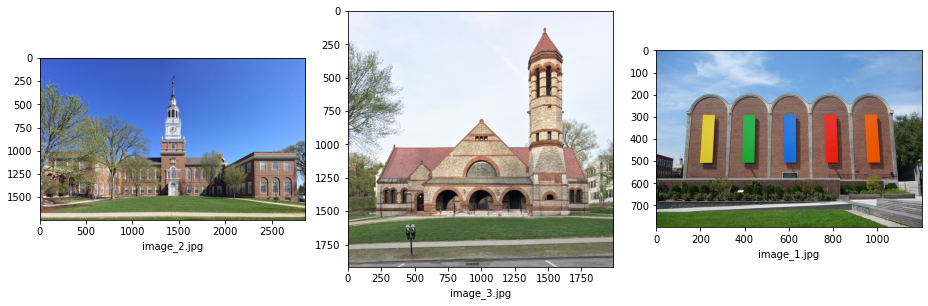

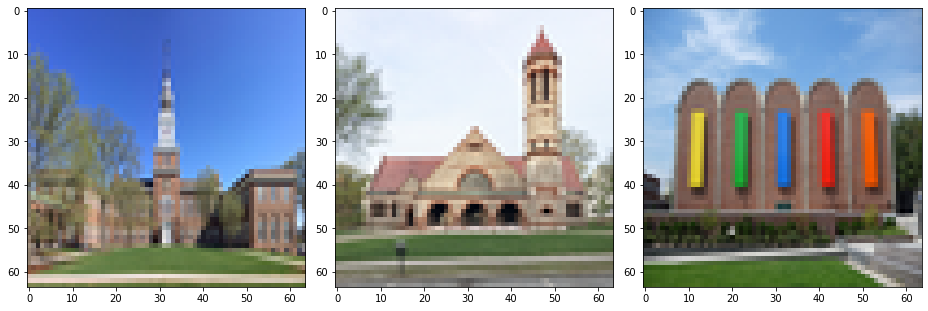

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sys 
import matplotlib.pyplot as plt
import os 
from PIL import Image
import seaborn as sns
from copy import deepcopy 


# # **Data Loading**
# Upload the dataset for this assignment 

# In[3]:


#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
image_path = 'images/'


# Load images 
images = os.listdir(image_path)
print(images)


# ## **Problem 1: Revisit: $K$-Means Clustering (Color Compression)**
# In this problem, we revisit the K-means clustering algorithm to compress the number of pixels in an image. We will also implement the algorithm from scratch.

# Display set of images 

# In[4]:


#display all images in a 1*5 subplot     
fig, axes = plt.subplots(1, 3, figsize = (13, 10))

for i, d in enumerate(images):
    img = plt.imread(image_path + d)
    axes[i].imshow(img)
    axes[i].set_xlabel(d)

fig.tight_layout(h_pad=1, w_pad=1)


# In[5]:


# The following function resizes the image to return a size*size rgb vector representing an image
def image_resize (img_path, size):
    # resize image 
    img = Image.open(img_path)
    img = img.resize((size, size), Image.ANTIALIAS)
    return img


# > **a)** Resize and display all the given images to a $64*64$ image in RGB format

# In[6]:


def resize_all (images): 
    
    new_images = []    # array to store resized images 
    
    for i in images:
        new_images.append(image_resize(image_path + i, 64))
        
    return new_images 


# In[86]:


# display the resized images below
new_images = resize_all(images)

def plot_images (new_images):
    fig, axes = plt.subplots(1, 3, figsize = (13, 10))

    for i, d in enumerate(new_images):
        axes[i].imshow(d)

    fig.tight_layout(h_pad=1, w_pad=1)
    
plot_images(new_images)




Iterations : 0, % Finished : 0.0%, Score : 267473.4162685261
Iterations : 1, % Finished : 0.2%, Score : 85104.72096764999
Iterations : 2, % Finished : 0.4%, Score : 71824.58489398038
Iterations : 3, % Finished : 0.6%, Score : 68520.92899087592
Iterations : 4, % Finished : 0.8%, Score : 67350.37461360445
Iterations : 5, % Finished : 1.0%, Score : 66999.29696380947
Iterations : 6, % Finished : 1.2%, Score : 66816.13130776443
Iterations : 7, % Finished : 1.4000000000000001%, Score : 66440.02559702299
Iterations : 8, % Finished : 1.6%, Score : 65826.85669443638
Iterations : 9, % Finished : 1.7999999999999998%, Score : 65378.038390072965
Iterations : 10, % Finished : 2.0%, Score : 65177.004852884806
Iterations : 11, % Finished : 2.1999999999999997%, Score : 65105.227106357765
Iterations : 12, % Finished : 2.4%, Score : 65084.57977214193
Iterations : 13, % Finished : 2.6%, Score : 65090.9910107228
Iterations : 14, % Finished : 2.8000000000000003%, Score : 65086.175003585544
Iterations : 15, 

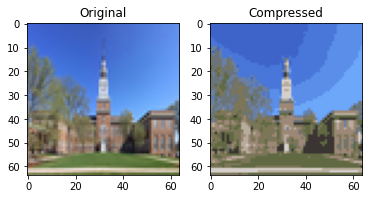

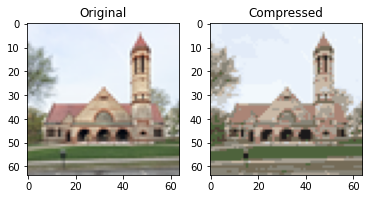

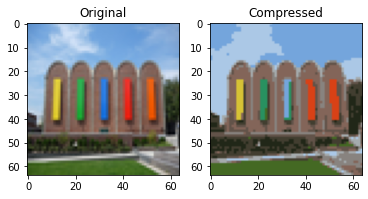

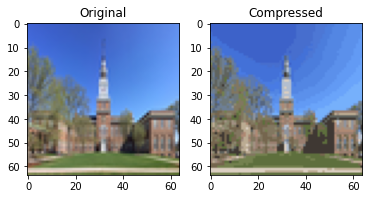

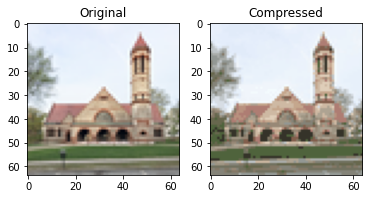

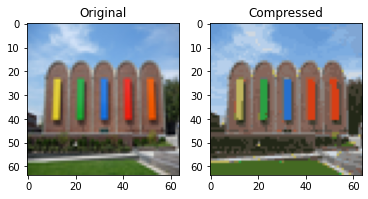

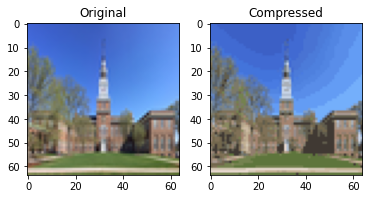

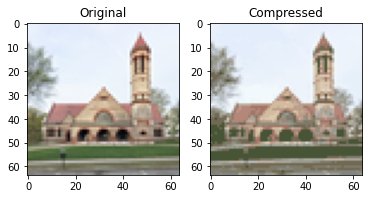

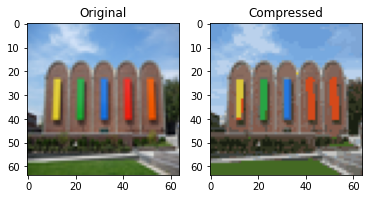

In [4]:
class kmeans():
    def __init__(self, k, data,plot):
        self.plot = plot
        self.data = data.reshape(-1,3)
        self.k = k
        self.dtraj = None
    def initalize(self):
        self.idx = np.random.randint(0,len(self.data), self.k)
        self.dic = dict(zip(list(self.idx), [{"mu":0.01, "id":[], "d":[], "center":np.array(self.data[i])} for i in self.idx]))
    def argmn(self,x, idx):
            return idx[x.argmin()], x.min()
    def update(self):
        self.mu_total = 0
        for i in self.dic.keys():
            mu = np.sum(np.array(self.dic[i]["d"]))
            if np.isnan(mu) == True:
                self.dic[i]["mu"] = 0
            else:
                self.mu_total += mu
                self.dic[i]["mu"] = mu
            center = np.average(self.data[np.array(self.dic[i]["id"]).astype(int)],axis=0)
            if np.sum(np.isnan(self.dic[i]["center"]) == True) == 0:
                self.dic[i]["center"] = center
    def clear_ids(self):
        for i in self.dic.keys():
            self.dic[i]["id"] = []
            self.dic[i]["d"] = []
    def iterate(self):
        self.clear_ids()
        for i in range(len(self.data)):
                    key, d = self.argmn(np.array([np.linalg.norm(self.data[i]-self.dic[c]["center"], ord=2) for c in self.idx]), self.idx)
                    self.dic[key]["id"].append(int(i));self.dic[key]["d"].append(d)
        self.update()
    def train(self,maxiter):
        self.initalize()
        self.iterate()
        self.iterations = 0
        self.scores = [self.mu_total]
        while (self.iterations <= maxiter):
            self.old_ids = [self.dic[i]["id"] for i in self.dic.keys()]
            self.iterate()
            self.new_ids = [self.dic[i]["id"] for i in self.dic.keys()]
            self.scores.append(self.mu_total)
            self.iterations += 1
            if np.sum(np.array([set(i) == set(j) for i,j in zip(self.old_ids, self.new_ids)]))==self.k:
                break
            #if np.array_equal(self.new_centers, self.old_centers) and self.diff <= thresh:
#                 if self.iterations<miniter:
#                     self.iterations = 0
#                     self.idx = np.random.randint(0,len(data), self.k)
#                     self.dic = dict(zip(list(self.idx), [{"mu":.01, "id":[], "d":[], "center":np.array(self.data[i])} for i in self.idx]))
#                     self.mu_total = None
#                     self.train(maxiter,miniter, thresh)
                #else:break
            print(f"Iterations : {self.iterations-1}, % Finished : {100*((self.iterations-1)/maxiter)}%, Score : {self.scores[self.iterations-1]}")
        if self.plot == True:
            plt.plot(self.scores)
            plt.xlabel("Iterations")
            plt.ylabel("Total Variance")
        return self
    def make_dtraj(self):
        arr = np.zeros((len(self.data),3))
        shape = int(len(self.data)**.5)
        for j,i in enumerate(self.dic.keys()):
            arr[np.array(self.dic[i]["id"]).astype(int)] = self.dic[i]["center"]
#         self.nstates = arr.max() + 1
#         self.color_list = plt.cm.jet
#         self.cs = [self.color_list(i) for i in range(self.color_list.N)]
#         self.cmap = colors.ListedColormap(self.cs)
#         self.boundaries = np.arange(self.nstates+1).tolist()
#         self.norm = colors.BoundaryNorm(self.boundaries, self.cmap.N, clip=True)
#         self.tick_locs = (np.arange(self.nstates) + 0.5)
#         self.ticklabels = np.around(np.arange(1,self.nstates+1))
        self.dtraj = arr
        return arr.reshape(shape,shape,3) 
    def proj(self):
            if type(self.dtraj) != np.ndarray:self.make_dtraj()
            fig,ax=plt.subplots(1,1,figsize=(10,10))
            s = ax.scatter(*self.data.T,c=self.dtraj,s=2,cmap=self.cmap,norm=self.norm)
            ax.set_xlabel(input("Please input xlabel"),fontsize=35)
            ax.set_ylabel(input("Please input ylabel"),fontsize=35)
            ax.tick_params(axis="x",labelsize=30)
            ax.tick_params(axis="y",labelsize=30)
            cbar = plt.colorbar(s,ax=ax)
            cbar.set_ticks(self.tick_locs)
            cbar.set_ticklabels(self.ticklabels)
            cbar.set_label("State",size=30)
            cbar.ax.tick_params(labelsize=15)
            for j,i in enumerate(self.dic.keys()):
                center = self.dic[i]["center"]
                plt.annotate(f"{j+1}",[center[k] for k in range(2)],color="black",size="20")
                plt.scatter(center[0], center[1], c="black")
           


# In[170]:


k = 12
im = [np.asarray(i) for i in new_images]
im_comp = [kmeans(k,im[i],False).train(500).make_dtraj() for i in range(3)]
for i,c in zip(im,im_comp):
    f,axes = plt.subplots(1,2)
    for ax,name,d in zip(axes.flat,["Original", "Compressed"],[i,c]):
        ax.imshow(d.astype(int));ax.set_title(name)


# >**f)** Run a k means clustering algorithm to compress an image based on k and n_runs

# In[83]:


def number_of_unique_pixels (images):
     # compute the average number of unique pixels in the set of original images 
        
    pixel_set = []
    for img in images:
        arr = []
        for i in range(len(img)):
            for j in range(len(img[0])):
                pixel = tuple(img[i, j])
                arr.append(pixel)
        pixel_set.append(len(arr))
        
    return sum(pixel_set)/len(images)


# In[171]:


k = 30
im_comp = [kmeans(k,im[i],False).train(1).make_dtraj() for i in range(3)]
for i,c in zip(im,im_comp):
    f,axes = plt.subplots(1,2)
    for ax,name,d in zip(axes.flat,["Original", "Compressed"],[i,c]):
        ax.imshow(d.astype(int));ax.set_title(name)
average_original_pixels = number_of_unique_pixels(im)
print('compression factor = {}%'.format(k/average_original_pixels*100))


# In[192]:


# The average number of pixels in the compressed image = 300

k = [50,30,30]
im = [np.asarray(i) for i in new_images]
im_comp = [kmeans(ks,im[i],False).train(1).make_dtraj() for i,ks in enumerate(k)]
for i,c in zip(im,im_comp):
    f,axes = plt.subplots(1,2)
    for ax,name,d in zip(axes.flat,["Original", "Compressed"],[i,c]):
        ax.imshow(d.astype(int));ax.set_title(name)
average_original_pixels = number_of_unique_pixels(im)
print('compression factor = {}%'.format(k[0]/average_original_pixels*100))





# >**g)** Whats the effect of increasing the number of iterations, n_runs? Whats the effect of increasing k?



#TODO
 # the images become higher resolution as we increase the number of clusters and iterations. 


# >**h)** For our stopping criterion, we used the number of iterations (n_runs) to finish a run. What alternative method (or 
# metric) could you use to automate the stopping criterion?


#TODO
 # I stopped the training when the cluster assignments stopped changing by checking the updates to the
 # after each iteration as can be seen in my class implementation

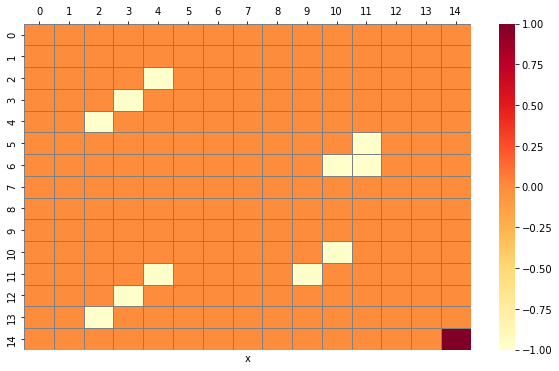

In [8]:
def generate_world (grid_size):
    fig, axes = plt.subplots(figsize = (10, 6))
    
    # Quick sand locations that we want to avoid 
    quicksand = [(2, 4), (3, 3), (4, 2), (12, 3), (13, 2), (11, 4), (11, 9), (6, 10), (6, 11), (5, 11), (10, 10)]
    
    grid = np.zeros((grid_size, grid_size))
    for danger in quicksand:  # These are signified by a reward of -1 
        x, y = danger 
        grid[x, y] = -1
        
    # The location we want to traverse to!  (reward = 1)
    grid[grid_size -1, grid_size -1] = 1  
            
    df = pd.DataFrame(grid)
    sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey')
    axes.xaxis.set_ticks_position("top")
    axes.set_xlabel('x')
    return grid 

gridsize = 15
rewards = generate_world(gridsize)    


# To run any RL, we need to specify a Markov Decision Process which is a tuple comprising of ${S,A,P, R, \gamma}$. In this problem: <br>
# 
# > $S$ - denotes states, which are the grid coordinates, (x, y). <br> 
# > $A$ - denotes agent actions: will consider the following 1-step movement actions $(0 - right, 1 - down, 2 - left, 3 - up)$ <br>
# > $P$ - denotes the transition matrix $P: S\times A \times S$ which is the probability of going to state $s'$, from state $s$, via action $a$. We will consider a deterministic environment where  $p(s, a, s') = 1$ if it's possible to take action $a$ from state $s$ leading to state $s'$, otherwise its $0$ <br> 
# > $R$ - the reward for the goal state, $(x = gridsize -1, y = gridsize -1) = 1$. The reward for quicksand locations = -1, the reward for any other state = 0.<br>
# > $\gamma$ - discount factor. Variable caters for preference of immediate rewards over long-term rewards. We will consider $\gamma = 0.8$ <br>

# Several Reinforcement Learning algorithms exist in literature. In this problem we will examine: <br>
# 1. Q-Learning  <br>
# 2. Deep Q-Learning

# > **a) Q-Learning**. The algorithm for Q-learning is shown below <br> 
# 
# ![qlearning_1.png](attachment:qlearning_1.png)
# 
# Source: https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf

# Another look at the algorithm is shown below:
# ![q_learning2.png](attachment:q_learning2.png)
# Source: https://en.wikipedia.org/wiki/Q-learning.

# > In short, we are updating the current q-values by adding proportions of the previous q-value, the reward for the current transition (s, a, s'); and some portion of the maximum discounted future q-values. 

# > **(a1)** TODO: Initialize a q-table $Q(s, a)$ which comprises of each state $s$, and the possible movement actions from each states. <br>  $\;\;\;\;\;$ Dimensions should be $Q: S\times A$, where $S$ - state space, $A$ - action space. <br><br> 
# $\;\;\;\;\;$ Note: Table should be initialized to zeros! -Represent the q-table as a dictionary with states representing the grid locations, <br> $\;\;\;\;\;$ and a list representing the possible 4 actions (integers) from each state. 

# In[306]:


#  TODO: Initialize Q-table 
nodes = []
actions = []
li = 14
lj = 14
for i in range(15):
    for j in range(15):
        a = []
        if j/lj != 1:a.append(0)
        if i/li != 1:a.append(1)
        if j != 0:a.append(2)
        if i != 0:a.append(3)
        nodes.append((i,j))
        actions.append(a)
Q = dict(zip(nodes,actions))
act = dict(zip(range(4),[np.array(i) for i in [[0,1],[1,0],[0,-1],[-1,0]]]))


# > **(a2)** TODO: Write a function to determine whether a state (x, y) is terminal (end state). Terminal states are quicksand locations with a reward = -1 and the goal state with a reward of 1.

# In[307]:


#TODO: is_terminal state? 
def is_terminal (xy,grid):
     return abs(grid[xy]) == 1


# > **(a3)** TODO: Given a current state, $s$, write a function to compute the set of all successive states (in 1-timestep) that an agent can traverse <br> $\;\;\;\;\;$ to as well as their corresponding actions. For example, if an agent is in state $(0, 0)$, it can go to state $(0, 1)$ by taking the right action = 0; $\;\;\;\;\;$ it can also go to state $(1, 0)$ by taking the down action = 1. (NOTE: In some states, all 4 actions cannot be performed. For example, in <br> $\;\;\;\;\;$ state $(0, 0)$ an agent can't go up or left - hence your function should not consider these cases).

# In[308]:


# TODO: Get successive states
def get_next_states (xy,Q):
    next_states = [tuple(np.array(xy)+act[i]) for i in Q[xy]]   # list of successive state s' from state s 
    next_actions = [i for i in Q[xy]] # list of actions taken to move to state s' from state s (should have same length as next_states
    return next_states, next_actions


# > **(a4)** TODO: From part a, you can see the variable labeled as the **estimate of the optimal future value, maxQ**. <br> $\;\;\;\;\;$ Using your q-table, and your next states list, compute the maxQ value as well as the action needed to get this value: 

# In[352]:


# TODO: compute the maxQ value 
def get_maxQ (next_states, next_actions,qval): 
    vals = np.array([qval[index] for index in next_states])
    idx = np.where(vals==vals.max())[0]
    idx = idx[np.random.randint(0,len(idx))]
    return vals[idx], next_actions[idx]


# > **(b1)**  TODO: To move within the grid,  and agent can be greedy and choose actions that takes it to states with the maximum q-values. <br> $\;\;\;\;\;$ However, this behavior has a tradeoff of not navigating other potentially beneficial states the agent might have missed in initial <br> $\;\;\;\;\;$ learning phases, hence several techniques are devised to determine which action an agent should choose. One of the most popular <br> $\;\;\;\;\;$ techniques is the e-greedy method where an agent is greedy $(1-\alpha)$ times, but also explores other states at a rate of $\alpha$. <br><br> $\;\;\;\;\;$ Implement the e-greedy method below: 

# In[ ]:





# In[398]:


def e_greedy (alpha,xy, max_action, next_actions):
    sample = np.random.uniform(0,1,1)[0]
    if sample<=(1-alpha):
        return max_action
    else:
        actions = np.array(list(set(next_actions).symmetric_difference(set([max_action]))))
        return actions[np.random.randint(0,len(actions))]




5
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]]


Text(0.5, 1.0, 'rewards')

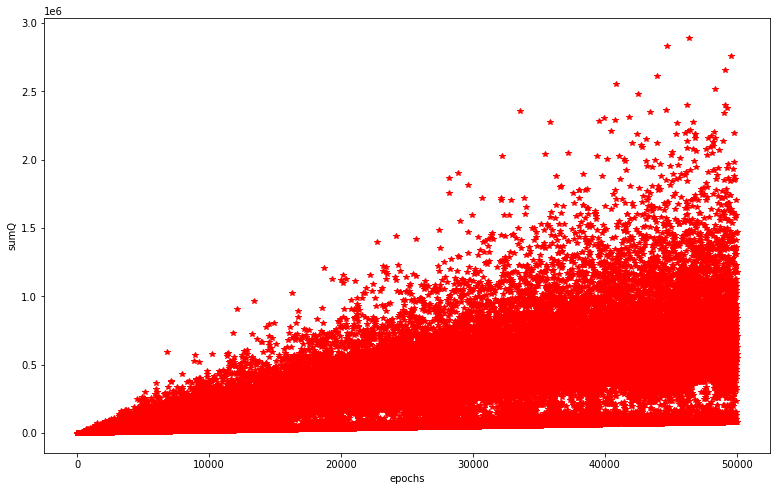

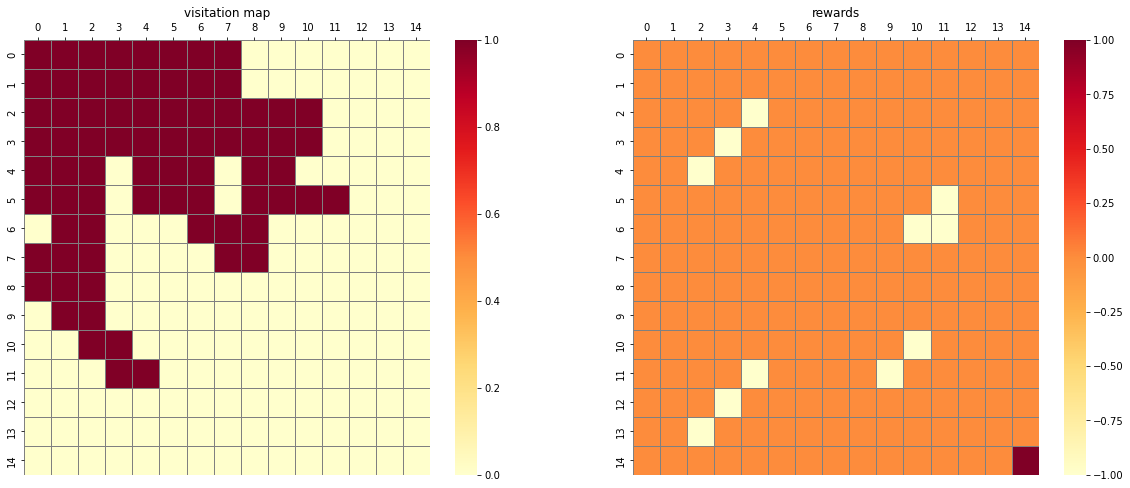

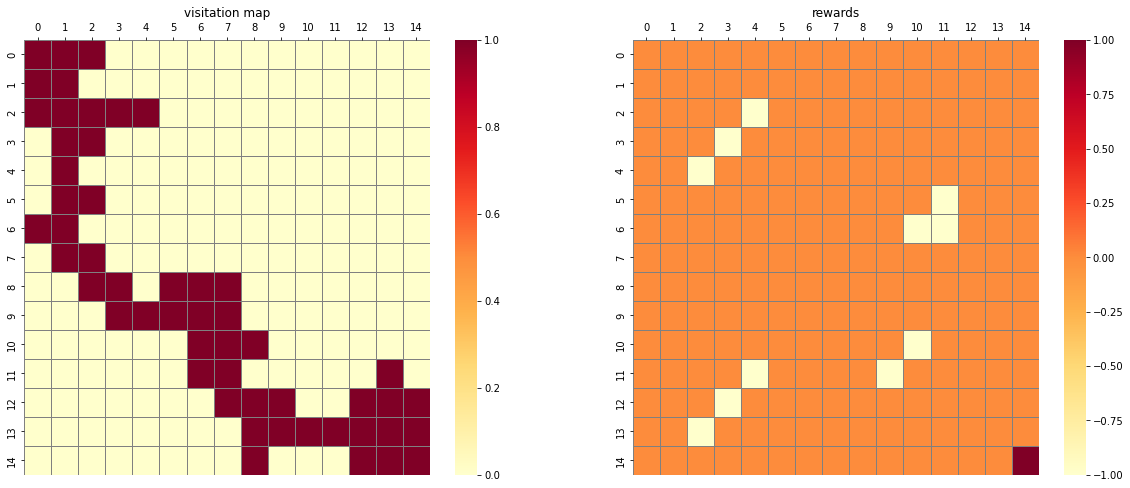

In [14]:
def QLearning (grid, Q,  gridsize = 15, alpha = 0.2, discount = 0.8, lr = .5, epochs = 50000):
    # (x, y) - initial state for the agent
    # alpha - exploration probability during action selection 
    # Q - q-table 
    qval = np.zeros((gridsize,gridsize))
    sumQ = []     # list of the sums of q-values for each epoch  
    Trajectories = []     # list of trajectories collected for each individual epoch 
    
    for epoch in range(epochs): 
        
        xy = (0, 0)  # start from initial state 

        new_trajs = [xy]  # store trajectory (paths) sequences 
    
        while not is_terminal(xy, grid):  # run until we reach a terminal state 
            
            # get the potential successive states and actions here 
            next_states, next_actions = get_next_states(xy ,Q) 
            
            # compute maxQ 
            maxQ, max_action = get_maxQ(next_states, next_actions,qval)
            #print(maxQ)

            # e-greedy method to choose either the max_action, or a random action at a rate of alpha 
            action = e_greedy(alpha, xy, max_action, next_actions)
            
            # compute new state based on the previous action  
            index = next_actions.index(action)
            #print(index)
            xy_next = next_states[index] 

            #  TODO: UPDATE Q-VALUES HERE:  
            #  UPDATE Q-value - should be a one liner!
            
            qval[xy] = qval[xy] + lr*(grid[xy_next]+(1-alpha)*(maxQ - qval[xy]))
            #print(grid[xy])

            # update states 
            xy = xy_next 
            
            # add new state to trajectories 
            new_trajs.append(xy)
                 
        sumQ.append(np.array([qval[i] for i in new_trajs]).sum())
        
        Trajectories.append(new_trajs)
        
    return sumQ, Trajectories, qval




sumQ, Trajectories, q = QLearning(rewards, Q)


# >**(c)** Plot a scatter plot of the sum of q-values (sumQ). How many trajectories are needed to reach convergence? 

# In[438]:


q


# In[439]:


fig, axes = plt.subplots(figsize = (13, 8))
axes.plot(sumQ, '*', color = 'red')
axes.set_xlabel('epochs')
axes.set_ylabel('sumQ')


# > **(d1)** TODO: The list $Trajectories$ records each trajectory obtained while performing Q_learning. Using the first 10 trajectories plot a heatmap showing whether a state has been visited or not?

# In[433]:


# TODO: Conplete the visitations array for the first 10 trajectories 
# indicate a state that has been visited as a one, and not visted as a 0

is_visited = np.zeros((gridsize, gridsize))

# fill up visitations here 
for Traj in Trajectories[:10]:
    for state in Traj:
        x, y = state 
        is_visited[x, y] = 1
        
visitations = is_visited


# In[434]:


fig, axes = plt.subplots (1, 2, figsize = (20, 8))

df = pd.DataFrame(visitations)
sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[0])
axes[0].xaxis.set_ticks_position("top")
axes[0].set_title('visitation map')

df1 = pd.DataFrame(rewards)
sns.heatmap(df1, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[1])
axes[1].xaxis.set_ticks_position("top")
axes[1].set_title('rewards')


# > **(d2)** Plot a similar plot for the last 10 trajectories 
# 

# In[405]:


visitations = np.zeros((gridsize, gridsize))

print(len(Trajectories[len(Trajectories) - 5: ]))


# fill up visitations here 
for Traj in Trajectories[len(Trajectories) - 5: ]:
    for state in Traj:
        x, y = state 
        visitations[x, y] = 1
        
print(visitations)


# In[406]:


fig, axes = plt.subplots (1, 2, figsize = (20, 8))

df = pd.DataFrame(visitations)
sns.heatmap(df, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[0])
axes[0].xaxis.set_ticks_position("top")
axes[0].set_title('visitation map')

df1 = pd.DataFrame(rewards)
sns.heatmap(df1, cmap='YlOrRd', linewidths=1, linecolor='grey', ax = axes[1])
axes[1].xaxis.set_ticks_position("top")
axes[1].set_title('rewards')


# > **(d3)** Comment on differences between observations in d1 vs d2? Does Q-learning find a policy that avoids obstacles? 

# In[ ]:





  # The algorithm was able to find a protocall to find the end path without hitting the negative reward patches, as can be seen by the visitation map. I ran the algorithm for 50000 epochs and the training data suggests that total convergence could take roughly 2X more epochs but my computer takes awhile to run 50000, so I'm capping it there